In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.express as px

import seaborn as sns

a4_dims = (11.7, 8.27)
# sns.set(font_scale=2, rc={'text.usetex' : True})
sns.set(font_scale=2)
sns.set_style("darkgrid", rc={"grid.linewidth": 5})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman', 'font_scale':10})

In [2]:
stats = pd.read_csv('stats_without_constraints.csv')
stats

,Unnamed: 0,num_variables,activation_function,absorption_criterion,ascent_stop_criterion,stopping_criterion_type,step_type,max_iterations,direction_type,initial_ascent_type,gamma,theta,f_value,binary,t_hmip,t_cplex,f_cplex,t_cplex_relax,f_cplex_relax
0,0,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-1.761793,0.000000,0.005721,0.020178,-1.761793e+00,0.028972,-1.761793e+00
1,1,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.026502,0.229990,0.054546,0.019552,0.000000e+00,0.028523,0.000000e+00
2,2,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.004965,0.015280,0.000000e+00,0.028238,0.000000e+00
3,3,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.040962,0.237554,0.021426,0.020885,0.000000e+00,0.028192,-4.096243e-02
4,4,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.002381,0.014781,0.000000e+00,0.027125,0.000000e+00
5,5,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.109834,0.388731,0.009178,0.023376,-1.098336e-01,0.027156,-1.098336e-01
6,6,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.023241,0.192597,0.054869,0.021174,-4.825439e-07,0.032371,-2.329317e-02
7,7,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.000000,0.000000,0.005754,0.015586,0.000000e+00,0.028885,0.000000e+00
8,8,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,0.010327,0.247169,0.053316,0.020085,0.000000e+00,0.029605,0.000000e+00
9,9,2,pwl,NaN,0.01,gradient,classic,500,classic,binary_neutral_ascent,0.9,0.01,-0.815778,0.249085,0.006847,0.016611,-8.157785e-01,0.030162,-8.157785e-01


In [3]:
stats = stats[['num_variables', 'f_value', 'f_cplex', 'f_cplex_relax', 't_hmip', 't_cplex', 't_cplex_relax', 'binary', 'activation_function', 'direction_type']]
stats['diff'] = (stats['f_value'] - stats['f_cplex']) / stats['num_variables']
stats

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,num_variables,f_value,f_cplex,f_cplex_relax,t_hmip,t_cplex,t_cplex_relax,binary,activation_function,direction_type,diff
0,2,-1.761793,-1.761793e+00,-1.761793e+00,0.005721,0.020178,0.028972,0.000000,pwl,classic,0.000000e+00
1,2,0.026502,0.000000e+00,0.000000e+00,0.054546,0.019552,0.028523,0.229990,pwl,classic,1.325094e-02
2,2,0.000000,0.000000e+00,0.000000e+00,0.004965,0.015280,0.028238,0.000000,pwl,classic,0.000000e+00
3,2,-0.040962,0.000000e+00,-4.096243e-02,0.021426,0.020885,0.028192,0.237554,pwl,classic,-2.048122e-02
4,2,0.000000,0.000000e+00,0.000000e+00,0.002381,0.014781,0.027125,0.000000,pwl,classic,0.000000e+00
5,2,-0.109834,-1.098336e-01,-1.098336e-01,0.009178,0.023376,0.027156,0.388731,pwl,classic,5.125206e-13
6,2,-0.023241,-4.825439e-07,-2.329317e-02,0.054869,0.021174,0.032371,0.192597,pwl,classic,-1.162036e-02
7,2,0.000000,0.000000e+00,0.000000e+00,0.005754,0.015586,0.028885,0.000000,pwl,classic,0.000000e+00
8,2,0.010327,0.000000e+00,0.000000e+00,0.053316,0.020085,0.029605,0.247169,pwl,classic,5.163554e-03
9,2,-0.815778,-8.157785e-01,-8.157785e-01,0.006847,0.016611,0.030162,0.249085,pwl,classic,5.417888e-14


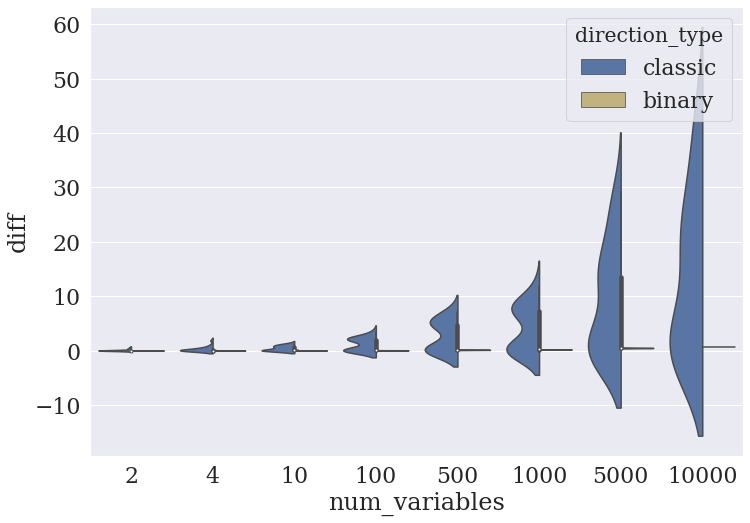

In [9]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=stats, x='num_variables', y='diff', scale="width", 
               palette={"classic": "b", "binary": "y"}, hue="direction_type", split=True)

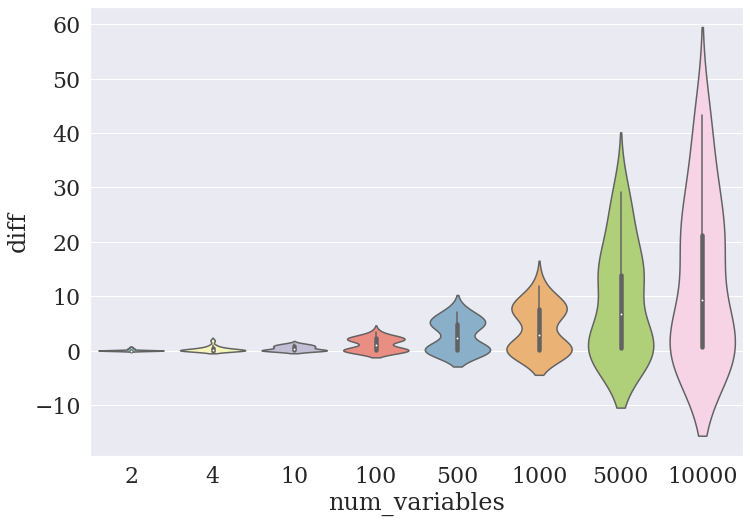

In [10]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(data=stats[stats['direction_type'] == 'classic'], x='num_variables', y='diff', scale="width", palette="Set3", figsize=(10,12))

In [19]:
stats_1 = stats[stats['direction_type'] == 'binary']

Text(0.5, 0, 'number of variables')

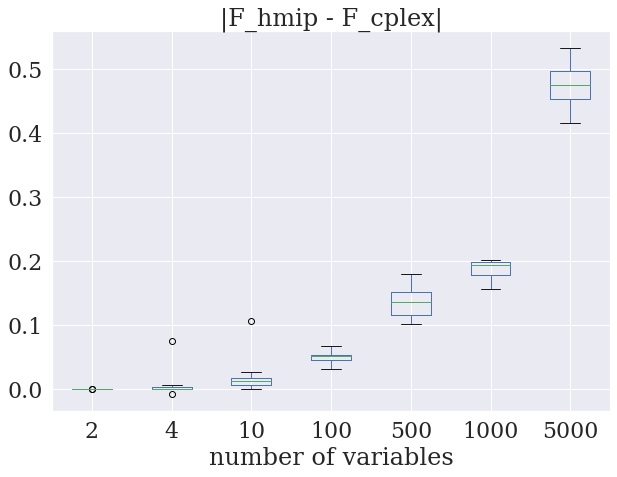

In [20]:
stats_new = pd.DataFrame()
stats_new['2'] = stats_1[stats_1['num_variables'] == 2]['diff'].values 
stats_new['4'] = stats_1[stats_1['num_variables'] == 4]['diff'].values 
stats_new['10'] = stats_1[stats_1['num_variables'] == 10]['diff'].values
stats_new['100'] = stats_1[stats_1['num_variables'] == 100]['diff'].values 
stats_new['500'] = stats_1[stats_1['num_variables'] == 500]['diff'].values 
stats_new['1000'] = stats_1[stats_1['num_variables'] == 1000]['diff'].values 
stats_new['5000'] = stats_1[stats_1['num_variables'] == 5000]['diff'].values

stats_new.plot.box(figsize=(10, 7), grid=True, title='|F_hmip - F_cplex|')
plt.xlabel('number of variables')

Text(0.5, 0, 'number of variables')

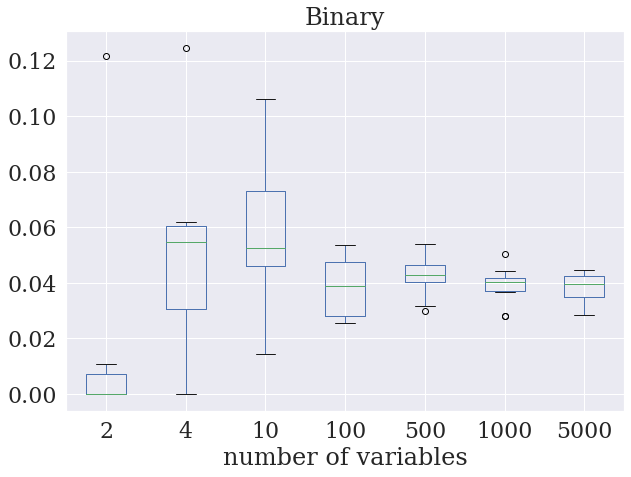

In [21]:
stats_new = pd.DataFrame()
stats_new[2] = stats_1[stats_1['num_variables'] == 2]['binary'].values / 2
stats_new[4] = stats_1[stats_1['num_variables'] == 4]['binary'].values / 4
stats_new[10] = stats_1[stats_1['num_variables'] == 10]['binary'].values / 10
stats_new[100] = stats_1[stats_1['num_variables'] == 100]['binary'].values / 100
stats_new['500'] = stats_1[stats_1['num_variables'] == 500]['binary'].values / 500
stats_new['1000'] = stats_1[stats_1['num_variables'] == 1000]['binary'].values / 1000
stats_new['5000'] = stats_1[stats_1['num_variables'] == 5000]['binary'].values / 5000

stats_new.plot.box(figsize=(10, 7), grid=True, title='Binary')
plt.xlabel('number of variables')

Text(0.5, 0, 'number of variables')

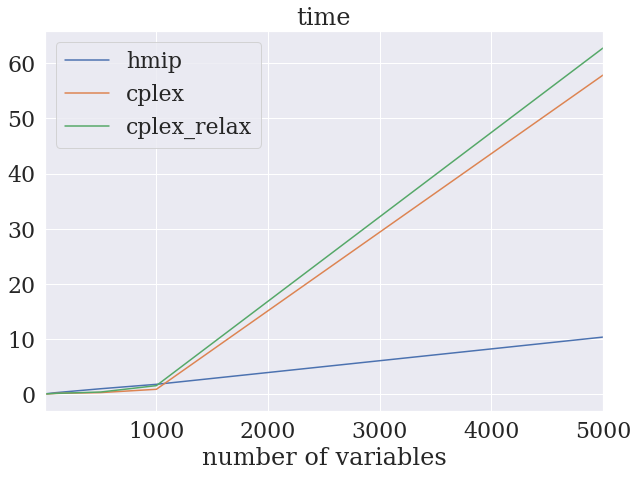

In [15]:
time_hmip = {}
time_hmip[2] = stats_1[stats_1['num_variables'] == 2]['t_hmip'].values.mean() 
time_hmip[4] = stats_1[stats_1['num_variables'] == 4]['t_hmip'].values.mean()
time_hmip[10] = stats_1[stats_1['num_variables'] == 10]['t_hmip'].values.mean()
time_hmip[100] = stats_1[stats_1['num_variables'] == 100]['t_hmip'].values.mean() 
time_hmip[500] = stats_1[stats_1['num_variables'] == 500]['t_hmip'].values.mean() 
time_hmip[1000] = stats_1[stats_1['num_variables'] == 1000]['t_hmip'].values.mean() 
time_hmip[5000] = stats_1[stats_1['num_variables'] == 5000]['t_hmip'].values.mean() 

time_hmip = pd.DataFrame.from_dict(time_hmip, orient='index', columns=['hmip'])

time_cplex = {}
time_cplex[2] = stats_1[stats_1['num_variables'] == 2]['t_cplex'].values.mean() 
time_cplex[4] = stats_1[stats_1['num_variables'] == 4]['t_cplex'].values.mean()
time_cplex[10] = stats_1[stats_1['num_variables'] == 10]['t_cplex'].values.mean()
time_cplex[100] = stats_1[stats_1['num_variables'] == 100]['t_cplex'].values.mean() 
time_cplex[500] = stats_1[stats_1['num_variables'] == 500]['t_cplex'].values.mean()
time_cplex[1000] = stats_1[stats_1['num_variables'] == 1000]['t_cplex'].values.mean() 
time_cplex[5000] = stats_1[stats_1['num_variables'] == 5000]['t_cplex'].values.mean() 

time_cplex = pd.DataFrame.from_dict(time_cplex, orient='index', columns=['cplex'])

time_cplex_relax = {}
time_cplex_relax[2] = stats_1[stats_1['num_variables'] == 2]['t_cplex_relax'].values.mean() 
time_cplex_relax[4] = stats_1[stats_1['num_variables'] == 4]['t_cplex_relax'].values.mean()
time_cplex_relax[10] = stats_1[stats_1['num_variables'] == 10]['t_cplex_relax'].values.mean()
time_cplex_relax[100] = stats_1[stats_1['num_variables'] == 100]['t_cplex_relax'].values.mean() 
time_cplex_relax[500] = stats_1[stats_1['num_variables'] == 500]['t_cplex_relax'].values.mean() 
time_cplex_relax[1000] = stats_1[stats_1['num_variables'] == 1000]['t_cplex_relax'].values.mean() 
time_cplex_relax[5000] = stats_1[stats_1['num_variables'] == 5000]['t_cplex_relax'].values.mean() 

time_cplex_relax = pd.DataFrame.from_dict(time_cplex_relax, orient='index', columns=['cplex_relax'])

time = pd.concat([time_cplex, time_hmip, time_cplex_relax], sort=False)

ax = time_hmip.plot(grid=True, figsize=(10, 7), title='time')
time_cplex.plot(ax=ax, figsize=(10, 7), grid=True, title='time')
time_cplex_relax.plot(ax=ax, figsize=(10, 7), grid=True, title='time')

plt.xlabel('number of variables')

In [35]:
stats_new = pd.DataFrame()
stats_new[2] = stats_1[stats_1['num_variables'] == 2]['norm_eq'].values / 2
stats_new[4] = stats_1[stats_1['num_variables'] == 4]['norm_eq'].values / 4
stats_new[10] = stats_1[stats_1['num_variables'] == 10]['norm_eq'].values / 10

stats_new.plot.box(figsize=(10, 7), grid=True, title='norm_eq')
plt.xlabel('number of variables')

KeyError: 'norm_eq'

In [59]:
stats_new = pd.DataFrame()
stats_new[2] = stats[stats['num_variables'] == 2]['norm_ineq'].values / 2
stats_new[4] = stats[stats['num_variables'] == 4]['norm_ineq'].values / 4
stats_new[10] = stats[stats['num_variables'] == 10]['norm_ineq'].values / 10

stats_new.plot.box(figsize=(10, 7), grid=True, title='norm_ineq')
plt.xlabel('number of variables')

KeyError: 'norm_ineq'